This jupyter notebook analyze the optimal operation (when fuel cell output meets cooling demand) under different BoP designs.
* Various climate conditions.
* Hot aisle & cold aisle temperature
* Room humidity

In [1]:
import numpy as np
import matlab.engine
import matplotlib.pyplot as plt

## DS1 v DS2

In [2]:
# DS1:
T_cold_aisle = 25+273.15
T_hot_aisle = 45+273.15
T_desorp = 120+273.15
H_env = 0.5
T_env_m = np.arange(24,37,2)+273.15
yH2O_ads = 0.013

In [3]:
# DS1 calculation:
eng = matlab.engine.start_matlab()
current_dir = eng.pwd()
# Add the path to the first BoP design (DS1)
eng.addpath(eng.strcat(current_dir, '/BoP/DS1/BoP_function'), nargout=0)

In [4]:
# Store results into numpy array:
DS1_EE_m = np.zeros(T_env_m.shape)
DS1_H_room_m = np.zeros(T_env_m.shape)
DS1_net_water_m = np.zeros(T_env_m.shape)
# Perform matlab calculations:
for i in range(len(T_env_m)):
    T_env = float(T_env_m[i])
    result = eng.optimal_operation(T_env, H_env, T_cold_aisle, T_hot_aisle, T_desorp, yH2O_ads)
    DS1_EE_m[i] = result["EE"]*100
    DS1_H_room_m[i] = result["H_room"]*100
    DS1_net_water_m[i] = result["net_water"]/result["n_H2O_FC"]*100

In [5]:
# DS2 calculation:
eng = matlab.engine.start_matlab()
current_dir = eng.pwd()
# Add the path to the first BoP design (DS2)
eng.addpath(eng.strcat(current_dir, '/BoP/DS2/BoP_function'), nargout=0)

In [6]:
# Store results into numpy array:
DS2_EE_m = np.zeros(T_env_m.shape)
DS2_H_room_m = np.zeros(T_env_m.shape)
DS2_net_water_m = np.zeros(T_env_m.shape)
# Perform matlab calculations:
for i in range(len(T_env_m)):
    T_env = float(T_env_m[i])
    result = eng.optimal_operation(T_env, H_env, T_cold_aisle, T_hot_aisle, yH2O_ads)
    DS2_EE_m[i] = result["EE"]*100
    DS2_H_room_m[i] = result["H_room"]*100
    DS2_net_water_m[i] = result["net_water"]/result["n_H2O_FC"]*100

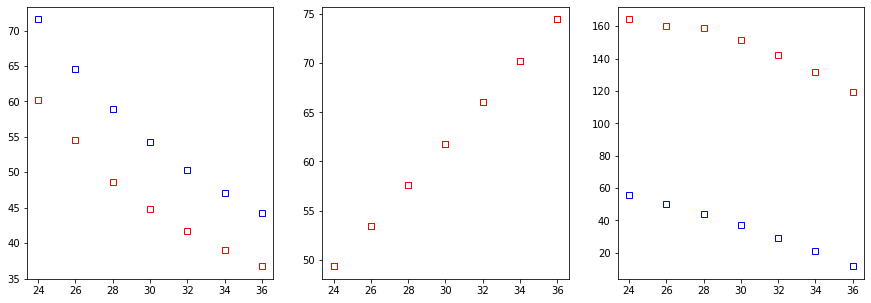

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (15, 5))
ax[0].plot(T_env_m-273.15, DS1_EE_m, linestyle = "None", mfc='none', marker="s", mec="b")
ax[0].plot(T_env_m-273.15, DS2_EE_m, linestyle = "None", mfc='none', marker="s", mec="r")
ax[1].plot(T_env_m-273.15, DS1_H_room_m, linestyle = "None", mfc='none', marker="s", mec="b")
ax[1].plot(T_env_m-273.15, DS2_H_room_m, linestyle = "None", mfc='none', marker="s", mec="r")
ax[2].plot(T_env_m-273.15, DS1_net_water_m, linestyle = "None", mfc='none', marker="s", mec="b")
ax[2].plot(T_env_m-273.15, DS2_net_water_m, linestyle = "None", mfc='none', marker="s", mec="r")

## Aisle conditions

In [35]:
T_env_m = np.arange(24,32,2)+273.15
H_env = 0.5
yH2O_ads = 0.013
# condition 1: Hot aisle - 40 C, cold aisle - 20 C.
T_cold_aisle = 20+273.15
T_hot_aisle = 40+273.15
# Store results into numpy array:
cond1_EE_m = np.zeros(T_env_m.shape)
cond1_H_room_m = np.zeros(T_env_m.shape)
cond1_net_water_m = np.zeros(T_env_m.shape)
# Perform matlab calculations:
for i in range(len(T_env_m)):
    T_env = float(T_env_m[i])
    result = eng.optimal_operation(T_env, H_env, T_cold_aisle, T_hot_aisle, yH2O_ads)
    cond1_EE_m[i] = result["EE"]*100
    cond1_H_room_m[i] = result["H_room"]*100
    cond1_net_water_m[i] = result["net_water"]/result["n_H2O_FC"]*100

In [29]:
# condition 2: Hot aisle - 40 C, cold aisle - 27 C.
T_cold_aisle = 27+273.15
T_hot_aisle = 40+273.15
# Store results into numpy array:
cond2_EE_m = np.zeros(T_env_m.shape)
cond2_H_room_m = np.zeros(T_env_m.shape)
cond2_net_water_m = np.zeros(T_env_m.shape)
# Perform matlab calculations:
for i in range(len(T_env_m)):
    T_env = float(T_env_m[i])
    result = eng.optimal_operation(T_env, H_env, T_cold_aisle, T_hot_aisle, yH2O_ads)
    cond2_EE_m[i] = result["EE"]*100
    cond2_H_room_m[i] = result["H_room"]*100
    cond2_net_water_m[i] = result["net_water"]/result["n_H2O_FC"]*100

In [30]:
# condition 3: Hot aisle - 50 C, cold aisle - 27 C.
T_cold_aisle = 27+273.15
T_hot_aisle = 50+273.15
# Store results into numpy array:
cond3_EE_m = np.zeros(T_env_m.shape)
cond3_H_room_m = np.zeros(T_env_m.shape)
cond3_net_water_m = np.zeros(T_env_m.shape)
# Perform matlab calculations:
for i in range(len(T_env_m)):
    T_env = float(T_env_m[i])
    result = eng.optimal_operation(T_env, H_env, T_cold_aisle, T_hot_aisle, yH2O_ads)
    cond3_EE_m[i] = result["EE"]*100
    cond3_H_room_m[i] = result["H_room"]*100
    cond3_net_water_m[i] = result["net_water"]/result["n_H2O_FC"]*100

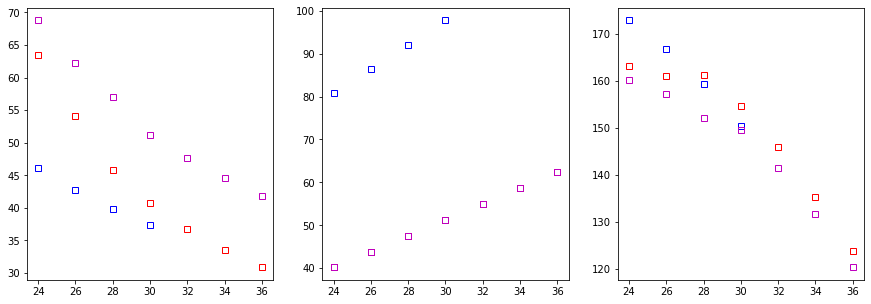

In [36]:
T_env_m_1 = np.arange(24,32,2)
T_env_m_2 = np.arange(24,37,2)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (15, 5))
ax[0].plot(T_env_m_1, cond1_EE_m, linestyle = "None", mfc='none', marker="s", mec="b")
ax[0].plot(T_env_m_2, cond2_EE_m, linestyle = "None", mfc='none', marker="s", mec="r")
ax[0].plot(T_env_m_2, cond3_EE_m, linestyle = "None", mfc='none', marker="s", mec="m")
ax[1].plot(T_env_m_1, cond1_H_room_m, linestyle = "None", mfc='none', marker="s", mec="b")
ax[1].plot(T_env_m_2, cond2_H_room_m, linestyle = "None", mfc='none', marker="s", mec="r")
ax[1].plot(T_env_m_2, cond3_H_room_m, linestyle = "None", mfc='none', marker="s", mec="m")
ax[2].plot(T_env_m_1, cond1_net_water_m, linestyle = "None", mfc='none', marker="s", mec="b")
ax[2].plot(T_env_m_2, cond2_net_water_m, linestyle = "None", mfc='none', marker="s", mec="r")
ax[2].plot(T_env_m_2, cond3_net_water_m, linestyle = "None", mfc='none', marker="s", mec="m")